In [1]:
%matplotlib widget

import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))
import h5py
import os
import torch
os.environ['TORCH_CUDA_ARCH_LIST'] = f'{torch.cuda.get_device_properties(0).major}.{torch.cuda.get_device_properties(0).minor}'
import numpy as np
from tqdm.autonotebook import tqdm
import os
from BasisConvolution.util.dataloader import datasetLoader, processFolder#, DataLoader
from BasisConvolution.util.hyperparameters import defaultHyperParameters
from BasisConvolution.util.dataPlotting import getFileCount, getPreparePlotFunction, getUpdatePlotFunction
import matplotlib.pyplot as plt
import ipywidgets as widgets

/tmp/ipykernel_2890583/3069418549.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
hyperParameterDict = defaultHyperParameters()

hyperParameterDict['batch_size'] = 1
hyperParameterDict['maxRollOut'] = 0
hyperParameterDict['maxUnroll'] = 0

hyperParameterDict['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'
hyperParameterDict['device'] = 'cpu'

hyperParameterDict['augmentAngle'] = False
hyperParameterDict['augmentJitter'] = False
hyperParameterDict['zeroOffset'] = False

In [3]:

datasetPath = '/home/winchenbach/dev/diffSPH/partiBench/generator/export'
train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))
print(train_ds[0][2])
print(train_ds[0][2]['samples'][0])
print(train_ds[0][2]['samples'][-1])


{'fileName': '/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x1.0x1x0_2024_11_03-13_17_50.hdf5', 'frames': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 19

In [4]:
f = h5py.File(train_ds[0][2]['fileName'], 'r')

In [5]:
len(f['simulationExport'].keys()) - 1

4095

In [6]:
getFileCount(train_ds[0][2]['fileName'])

4094

Preparing Plot
Loading frame output_free-slip_128x2x1.0x1x0_2024_11_03-13_17_50.hdf5:"00001" w/ unroll length 0
Loaded frame 00001
Loaded Frame


Dropdown(description='File:', layout=Layout(width='initial'), options=('/home/winchenbach/dev/diffSPH/partiBen…

IntSlider(value=0, description='Slider:', max=4096)

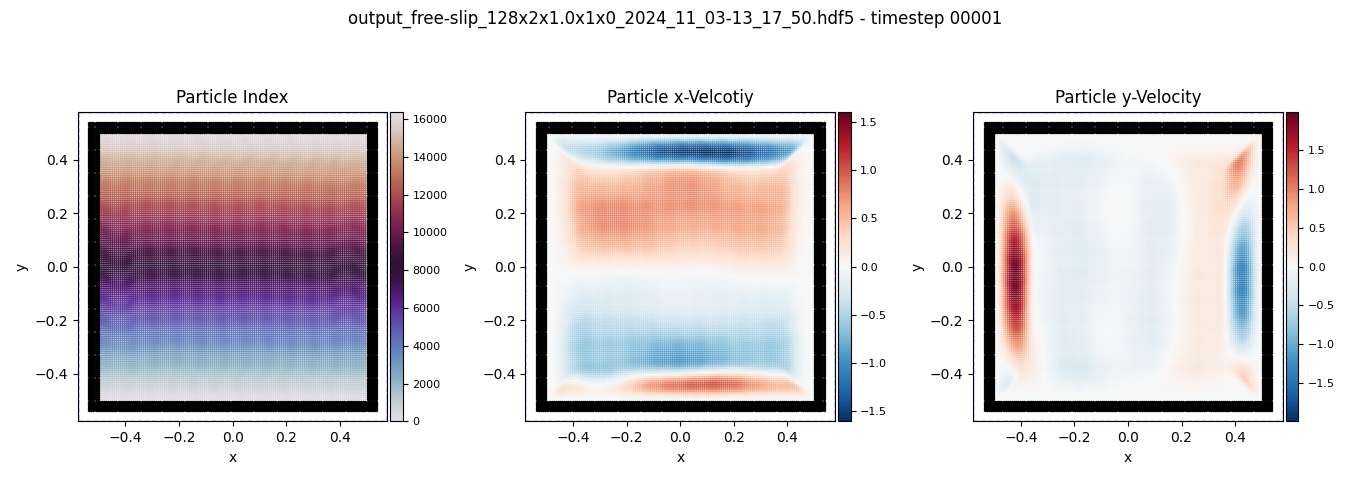

Preparing Plot for ['/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x1.0x1x0_2024_11_03-13_17_50.hdf5', '00033', None, None, None]
Loading frame output_free-slip_128x2x1.0x1x0_2024_11_03-13_17_50.hdf5:"00033" w/ unroll length 0
Loaded frame 00033
Loaded Frame
Preparing Plot for ['/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x1.0x1x0_2024_11_03-13_17_50.hdf5', '04096', None, None, None]
Loading frame output_free-slip_128x2x1.0x1x0_2024_11_03-13_17_50.hdf5:"04096" w/ unroll length 0
Loaded frame 04096
Loaded Frame
Preparing Plot for ['/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_wObstacle_128x2x8.0x2x0_2024_11_03-21_32_01.hdf5', '04096', None, None, None]
Loading frame output_free-slip_wObstacle_128x2x8.0x2x0_2024_11_03-21_32_01.hdf5:"04096" w/ unroll length 0
Loaded frame 04096
Loaded Frame
Preparing Plot for ['/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_none_128x2x2.0x

In [7]:
# datasetPath = '../datasets/SFBC_dataset_I/dataset'
# datasetPath = '../datasets/SFBC_dataset_II/dataset/train'
# datasetPath = '../datasets/SFBC_dataset_III/dataset/train'
# datasetPath = '../datasets/SFBC_dataset_I/dataset'
datasetPath = '/home/winchenbach/dev/diffSPH/partiBench/generator/export'

train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))

plotState = getPreparePlotFunction(train_ds.fileFormat)(train_ds, hyperParameterDict)
updateFn = getUpdatePlotFunction(train_ds.fileFormat)

dropdown = widgets.Dropdown(options=train_ds.fileNames, description='File:', layout={'width': 'initial'})
slider = widgets.IntSlider(min=0, max=getFileCount(train_ds.fileNames[0]) + 2, value=0, description='Slider:')

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        slider.max = getFileCount(change['new']) + 2
        if slider.value > slider.max:
            slider.value = 0
        # print(change['new'], slider.value)
        updateFn(plotState, train_ds, hyperParameterDict, [change['new'], slider.value, None, None, None])

def on_change_slider(change):
    if change['type'] == 'change' and change['name'] == 'value':   
        # print(change['new'])
        updateFn(plotState, train_ds, hyperParameterDict, [dropdown.value, change['new'], None, None, None])

dropdown.observe(on_change)
slider.observe(on_change_slider)

display(dropdown)
display(slider)

00002
04096


In [3]:

datasetPath = '/home/winchenbach/dev/diffSPH/partiBench/generator/export'
folder = processFolder(hyperParameterDict, datasetPath)
train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))

In [4]:
train_ds[0]

('/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x1.0x1x0_2024_11_03-13_17_50.hdf5',
 '00002',
 {'fileName': '/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x1.0x1x0_2024_11_03-13_17_50.hdf5',
  'frames': [2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   10

In [4]:
fileNames = train_ds.fileNames
print(fileNames)

# for fileName in fileNames

['/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x1.0x1x0_2024_11_03-13_17_50.hdf5', '/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x1.0x2x0_2024_11_03-13_27_25.hdf5', '/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x1.0x3x0_2024_11_03-13_37_00.hdf5', '/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x1.0x4x0_2024_11_03-13_46_34.hdf5', '/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x2.0x1x0_2024_11_03-13_56_09.hdf5', '/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x2.0x2x0_2024_11_03-14_05_47.hdf5', '/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x2.0x3x0_2024_11_03-14_15_24.hdf5', '/home/winchenbach/dev/diffSPH/partiBench/generator/export/output_free-slip_128x2x2.0x4x0_2024_11_03-14_25_03.hdf5', '/home/winchenbach/dev/diffSPH/partiBench/generator/export/outp

In [5]:
fileName, key, fileData, fileIndex, fileOffset = train_ds[0]
file = h5py.File(fileName, 'r')

In [6]:
inFile = file

In [7]:
device = hyperParameterDict['device']
dtype = torch.float32

In [8]:
print(inFile['initial']['fluid'].keys())
inFile['simulationExport']['00001'].keys()

grp = inFile['simulationExport']['00001']
print(grp.keys())

<KeysViewHDF5 ['UID', 'areas', 'densities', 'masses', 'positions', 'potential', 'velocities']>
<KeysViewHDF5 ['UID', 'boundaryDensity', 'boundaryVelocity', 'fluidDensity', 'fluidPosition', 'fluidShiftAmount', 'fluidVelocity']>


In [9]:
from BasisConvolution.util.testcases import computeSupport, parseSPHConfig

In [11]:
inFile['config'].keys()

<KeysViewHDF5 ['EOS', 'SPS', 'boundary', 'boundaryDiffusion', 'compute', 'dfsph', 'diffusion', 'domain', 'export', 'fluid', 'gravity', 'integration', 'kernel', 'neighborhood', 'noise', 'particle', 'plot', 'regions', 'shifting', 'simulation', 'sps', 'surfaceDetection', 'timestep']>

In [64]:
inFile.attrs.keys()

<KeysViewHDF5 ['area', 'fluidGravity', 'radius', 'restDensity', 'support', 'targetNeighbors']>

In [66]:
targetNeighbors = inFile.attrs['targetNeighbors']

staticFluidData = {
    'positions': torch.from_numpy(inFile['initial']['fluid']['positions'][:]).to(device = device, dtype = dtype),
    'velocities': torch.from_numpy(inFile['initial']['fluid']['velocities'][:]).to(device = device, dtype = dtype),
    'gravityAcceleration': torch.zeros_like(torch.from_numpy(inFile['initial']['fluid']['velocities'][:]).to(device = device, dtype = dtype)),
    'densities': torch.from_numpy(inFile['initial']['fluid']['densities'][:]).to(device = device, dtype = dtype),
    'areas': torch.from_numpy(inFile['initial']['fluid']['areas'][:]).to(device = device, dtype = dtype),
    'masses': torch.from_numpy(inFile['initial']['fluid']['masses'][:]).to(device = device, dtype = dtype),
    'supports': computeSupport(torch.from_numpy(inFile['initial']['fluid']['areas'][:]).to(device = device, dtype = dtype), targetNeighbors, 2),
    'indices': torch.from_numpy(inFile['initial']['fluid']['UID'][:]).to(device = device, dtype = torch.int32),
    'numParticles': len(inFile['initial']['fluid']['positions'][:]),                                  
}

config = parseSPHConfig(inFile, device, dtype)
area = inFile.attrs['radius'] **2 if 'area' not in inFile.attrs else inFile.attrs['area']
support = np.max(staticFluidData['supports'].detach().cpu().numpy()) if 'support' not in inFile.attrs else inFile.attrs['support']
if hyperParameterDict['numNeighbors'] > 0:
    support = computeSupport(area, hyperParameterDict['numNeighbors'], 2)
attributes = {
    'support': support,
    'targetNeighbors': inFile.attrs['targetNeighbors'],
    'restDensity': inFile.attrs['restDensity'],
    'dt': config['timestep']['dt'],
    'time': 0.0,
    'radius': inFile.attrs['radius'],
    'area': area,
}


In [56]:
areas = torch.from_numpy(inFile['initial']['fluid']['areas'][:]).to(device = device, dtype = dtype)
print(areas)
computeSupport(areas, 45, 2)
hyperParameterDict['numNeighbors']
inFile.attrs['targetNeighbors']

tensor([6.1035e-05, 6.1035e-05, 6.1035e-05,  ..., 6.1035e-05, 6.1035e-05,
        6.1035e-05])


45.238956451416016

In [26]:
computeSupport(area, hyperParameterDict['numNeighbors'], 2)

NameError: name 'area' is not defined

In [28]:
if 'boundaryInformation' in inFile:
    staticBoundaryData = {
            'indices': torch.arange(0, inFile['boundaryInformation']['boundaryPosition'].shape[0], device = device, dtype = torch.int64),
            'positions': torch.from_numpy(inFile['boundaryInformation']['boundaryPosition'][:]).to(device = device, dtype = dtype),
            'normals': torch.from_numpy(inFile['boundaryInformation']['boundaryNormals'][:]).to(device = device, dtype = dtype),
            'areas': torch.from_numpy(inFile['boundaryInformation']['boundaryArea'][:]).to(device = device, dtype = dtype),
            'masses': torch.from_numpy(inFile['boundaryInformation']['boundaryArea'][:]).to(device = device, dtype = dtype) * config['fluid']['rho0'],
            'velocities': torch.from_numpy(inFile['boundaryInformation']['boundaryVelocity'][:]).to(device = device, dtype = dtype),
            'densities': torch.from_numpy(inFile['boundaryInformation']['boundaryRestDensity'][:]).to(device = device, dtype = dtype),
            'supports': torch.from_numpy(inFile['boundaryInformation']['boundarySupport'][:]).to(device = device, dtype = dtype),
            'bodyIDs': torch.from_numpy(inFile['boundaryInformation']['boundaryBodyAssociation'][:]).to(device = device, dtype = torch.int64),
            'numParticles': len(inFile['boundaryInformation']['boundaryPosition'][:]),
        } if 'boundaryInformation' in inFile else None
elif 'initial' in inFile:
    staticBoundaryData = {
        'indices': torch.from_numpy(inFile['initial']['boundary']['UID'][:]).to(device = device, dtype = torch.int64),
        'positions': torch.from_numpy(inFile['initial']['boundary']['positions'][:]).to(device = device, dtype = dtype),
        'normals': torch.from_numpy(inFile['initial']['boundary']['normals'][:]).to(device = device, dtype = dtype),
        'distances': torch.from_numpy(inFile['initial']['boundary']['distances'][:]).to(device = device, dtype = dtype),
        'areas': torch.from_numpy(inFile['initial']['boundary']['areas'][:]).to(device = device, dtype = dtype),
        'masses': torch.from_numpy(inFile['initial']['boundary']['masses'][:]).to(device = device, dtype = dtype),
        'velocities': torch.from_numpy(inFile['initial']['boundary']['velocities'][:]).to(device = device, dtype = dtype),
        'densities': torch.from_numpy(inFile['initial']['boundary']['densities'][:]).to(device = device, dtype = dtype),
        'supports': computeSupport(torch.from_numpy(inFile['initial']['boundary']['areas'][:]).to(device = device, dtype = dtype), inFile.attrs['targetNeighbors'], 2),
        'bodyIDs': torch.from_numpy(inFile['initial']['boundary']['bodyIDs'][:]).to(device = device, dtype = torch.int64),
        'numParticles': len(inFile['initial']['boundary']['UID'][:]),

    } if 'boundary' in inFile['initial'] else None
else:
    staticBoundaryData = None
print(staticBoundaryData)

{'indices': tensor([   0,    1,    2,  ..., 2657, 2658, 2659]), 'positions': tensor([[-0.5352, -0.5352],
        [-0.5273, -0.5352],
        [-0.5195, -0.5352],
        ...,
        [ 0.5195,  0.5352],
        [ 0.5273,  0.5352],
        [ 0.5352,  0.5352]]), 'normals': tensor([[-0.7071, -0.7071],
        [-0.6137, -0.7895],
        [-0.4851, -0.8745],
        ...,
        [ 0.4851,  0.8745],
        [ 0.6137,  0.7895],
        [ 0.7071,  0.7071]]), 'distances': tensor([-0.0497, -0.0445, -0.0402,  ..., -0.0402, -0.0445, -0.0497]), 'areas': tensor([6.1035e-05, 6.1035e-05, 6.1035e-05,  ..., 6.1035e-05, 6.1035e-05,
        6.1035e-05]), 'masses': tensor([0.0610, 0.0610, 0.0610,  ..., 0.0610, 0.0610, 0.0610]), 'velocities': tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]), 'densities': tensor([1., 1., 1.,  ..., 1., 1., 1.]), 'supports': tensor([nan, nan, nan,  ..., nan, nan, nan]), 'bodyIDs': tensor([0, 0, 0,  ..., 0,

In [32]:
inFile['simulationExport']['00001'].keys()

grp = inFile['simulationExport']['00001']

dynamicBoundaryData = {}
for k in staticBoundaryData.keys():
    if isinstance(staticBoundaryData[k], torch.Tensor):
        dynamicBoundaryData[k] = staticBoundaryData[k].clone()
    else:
        dynamicBoundaryData[k] = staticBoundaryData[k]

if 'boundaryDensity' in grp:
    dynamicBoundaryData['densities'] = torch.from_numpy(grp['boundaryDensity'][:]).to(device = device, dtype = dtype)
if 'boundaryVelocity' in grp:
    dynamicBoundaryData['velocities'] = torch.from_numpy(grp['boundaryVelocity'][:]).to(device = device, dtype = dtype)
if 'boundaryPosition' in grp:
    dynamicBoundaryData['positions'] = torch.from_numpy(grp['boundaryPosition'][:]).to(device = device, dtype = dtype)
if 'boundaryNormals' in grp:
    dynamicBoundaryData['normals'] = torch.from_numpy(grp['boundaryNormals'][:]).to(device = device, dtype = dtype)


<KeysViewHDF5 ['UID', 'boundaryDensity', 'boundaryVelocity', 'fluidDensity', 'fluidPosition', 'fluidShiftAmount', 'fluidVelocity']>

In [6]:
from BasisConvolution.util.dataloader import datasetLoader, loadAugmentedFrame

config, attributes, currentState, priorState, trajectoryStates = loadAugmentedFrame(0, train_ds, hyperParameterDict)

ImportError: cannot import name 'loadAugmentedFrame' from 'BasisConvolution.util.dataloader' (/home/winchenbach/dev/SFBC_tum_pbs/src/BasisConvolution/util/dataloader.py)

Dropdown(description='File:', layout=Layout(width='initial'), options=('/home/winchenbach/dev/diffSPH/partiBen…

IntSlider(value=0, description='Slider:', max=4094)

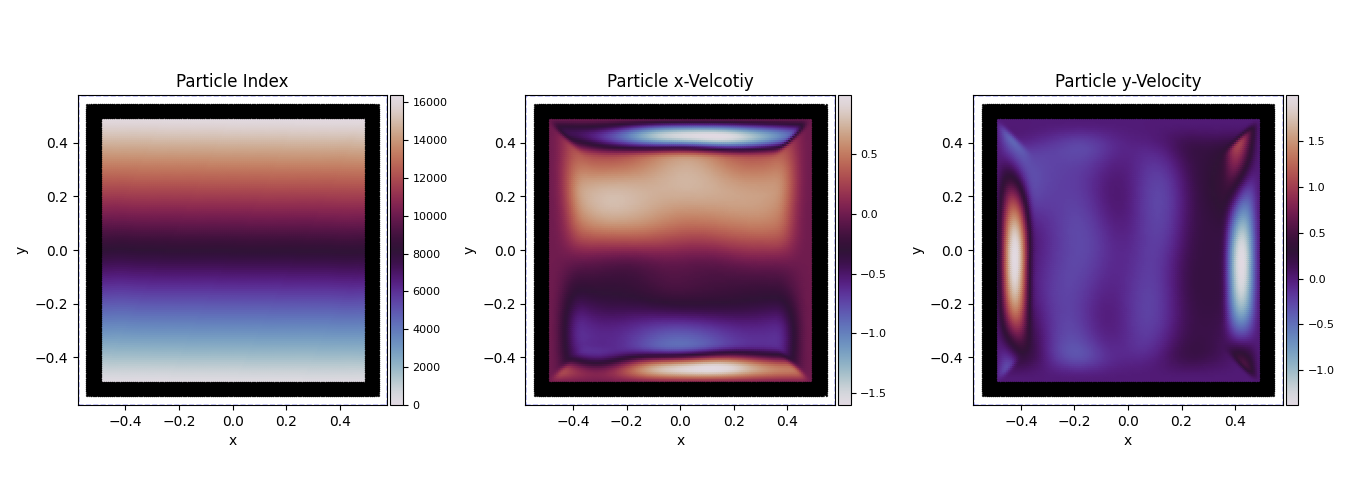

TypeError: 'NoneType' object is not subscriptable

In [3]:
# datasetPath = '../datasets/SFBC_dataset_I/dataset'
# datasetPath = '../datasets/SFBC_dataset_II/dataset/train'
# datasetPath = '../datasets/SFBC_dataset_III/dataset/train'
# datasetPath = '../datasets/SFBC_dataset_I/dataset'
datasetPath = '/home/winchenbach/dev/diffSPH/partiBench/generator/export'

train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))

plotState = getPreparePlotFunction(train_ds.fileFormat)(train_ds, hyperParameterDict)
updateFn = getUpdatePlotFunction(train_ds.fileFormat)

dropdown = widgets.Dropdown(options=train_ds.fileNames, description='File:', layout={'width': 'initial'})
slider = widgets.IntSlider(min=0, max=getFileCount(train_ds.fileNames[0]), value=0, description='Slider:')

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        slider.max = getFileCount(change['new'])
        if slider.value > slider.max:
            slider.value = 0
        # print(change['new'], slider.value)
        updateFn(plotState, train_ds, hyperParameterDict, [change['new'], slider.value, None, None, None])

def on_change_slider(change):
    if change['type'] == 'change' and change['name'] == 'value':   
        # print(change['new'])
        updateFn(plotState, train_ds, hyperParameterDict, [dropdown.value, change['new'], None, None, None])

dropdown.observe(on_change)
slider.observe(on_change_slider)

display(dropdown)
display(slider)